In [1]:
dataset = "mrf_data"

In [2]:
from MRF import *
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
data_in = pd.read_csv(f"/Users/ryanlucas/Desktop/MacroRandomForest/Datasets/{dataset}.csv")

In [5]:
oos_pos = np.arange(data_in.index[-50], data_in.index[-1]+1)
# oos_pos = np.arange(150, 200)

print(oos_pos)

[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199]


In [6]:
MRF = MacroRandomForest(data=data_in,
                        y_pos=0,
                        x_pos=np.arange(1,4), 
                        fast_rw = False, 
                        B = 1000, 
                        mtry_frac=0.25, 
                        oos_pos=oos_pos, 
                        trend_push=4,
                        quantile_rate=0.3, 
                        print_b = True, 
                        parallelise=True)

In [7]:
mrf_output = MRF._ensemble_loop()

In [8]:
mrf_output.keys()

dict_keys(['YandX', 'pred_ensemble', 'pred', 'S_names', 'betas', 'betas_draws_raw', 'betas_draws', 'model'])

In [9]:
profile_code = True
if profile_code:
    %load_ext line_profiler
    %lprun -f MRF._splitter_mrf MRF._one_MRF_tree(1)

Tree 2 out of 1000


Timer unit: 1e-06 s

Total time: 1.98931 s
File: /Users/ryanlucas/Desktop/MacroRandomForest/Python/MRF.py
Function: _splitter_mrf at line 730

Line #      Hits         Time  Per Hit   % Time  Line Contents
   730                                               def _splitter_mrf(self, x, y, z, whos_who, rando_vec, rw_regul_dat):
   731                                           
   732        80       3638.0     45.5      0.2          x = np.array(x)
   733        80       3047.0     38.1      0.2          uni_x = np.unique(x)
   734        80        724.0      9.1      0.0          splits = sorted(uni_x)
   735                                           
   736        80       7592.0     94.9      0.4          z = np.column_stack([np.ones(len(z)), z])
   737        80        293.0      3.7      0.0          min_frac_times_no_cols = self.min_leaf_fracz*z.shape[1]
   738                                           
   739        80       2519.0     31.5      0.1          y_as_list = np.array(y

In [10]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions.csv", index_col = "Unnamed: 0")

In [11]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [12]:
phils_preds.columns = my_preds.columns

In [13]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/mrf_betas.csv", index_col = "Unnamed: 0")

In [14]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [15]:
phils_betas.columns = my_betas.columns

In [16]:
abs(my_betas.subtract(phils_betas)).describe()

,0,1,2,3
count,199.000000,199.000000,199.000000,199.000000
mean,0.030142,0.037723,0.033142,0.035195
std,0.021478,0.028884,0.030268,0.025661
min,0.000275,0.000453,0.000089,0.000007
25%,0.012606,0.016250,0.010659,0.014424
50%,0.025529,0.033080,0.027103,0.032029
75%,0.044119,0.051463,0.043988,0.047003
max,0.092346,0.169054,0.142106,0.128973


Text(0.5, 0.98, '50 iterations of the NS dataset: betas from Python and R implementation. Python (light) and R (dark) colors.')

Text(0.5, 1.0, '$\\beta_0$')

Text(0.5, 1.0, '$\\beta_1$')

Text(0.5, 1.0, '$\\beta_2$')

Text(0.5, 1.0, '$\\beta_3$')

Text(0.5, 0, '$t$')

Text(0.5, 0, '$t$')

Text(0, 0.5, 'Coefficient')

Text(0, 0.5, 'Coefficient')

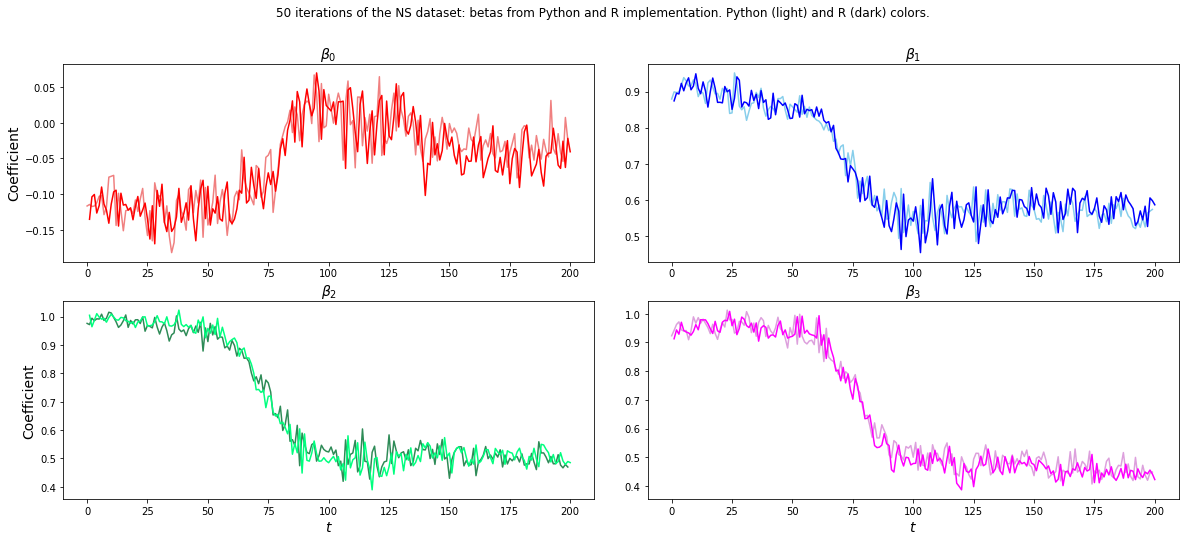

In [21]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle(f"50 iterations of the NS dataset: betas from Python and R implementation. Python (light) and R (dark) colors.", )

phils_preds_on = True
my_preds_on = True

plt.rcParams['figure.figsize'] = (20,15)
color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

if my_preds_on:
    ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
    ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
    ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
    ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])

if phils_preds_on:
    ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])
    ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])
    ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])
    ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])

ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

In [18]:
my_preds.columns = np.arange(0, len(my_preds.columns))

In [19]:
phils_preds

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
1,1.398999,-0.525898,-1.388499,-0.382544,-1.467836,-1.362952,0.743922,-1.150070,0.753593,-0.237494,...,-0.470351,-0.283693,-0.020776,-0.993766,0.744576,0.163803,0.406198,0.333136,0.149105,0.251964
2,1.668186,-0.389890,-1.342981,-0.536283,-0.850562,-2.633316,0.673999,-0.931841,0.789151,-0.343426,...,-0.497487,-0.479981,0.290582,-1.126369,0.524643,0.228417,0.732398,0.167235,0.107010,0.236991
3,1.434413,-0.275972,-0.938711,-0.610881,-1.510517,-1.772792,0.445306,-1.285635,1.153378,-0.374253,...,-0.429426,-0.441858,0.231431,-1.059597,0.824509,0.340519,0.491709,0.160089,0.039704,0.483248
4,1.496703,-0.529311,-0.996351,-1.060225,-1.617092,-2.361965,0.674775,-1.609624,0.775942,-0.825705,...,-1.062938,-0.413645,0.198451,-1.975461,0.438821,0.191677,0.535685,0.139957,-0.126848,0.258700
5,1.604732,-0.479390,-1.170736,-0.665379,-1.937878,-2.215637,0.568651,-1.113620,0.821539,-0.366997,...,-0.713757,-0.600362,-0.099824,-1.118683,0.545391,0.091510,0.649701,0.435944,0.109604,0.457170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.144954,-0.356645,-1.034449,-0.439638,-2.862006,-1.460388,0.524704,-0.705616,0.535281,-0.210786,...,-0.254606,-0.352037,0.266738,-1.536504,0.664014,0.199325,0.526516,0.471487,0.197356,0.438683
997,1.549435,-0.268076,-0.283996,-0.670176,-1.304263,-2.377798,0.453983,-1.189378,0.809098,-0.204289,...,-0.525574,-0.193368,0.373640,-0.612196,0.667958,0.137310,0.562102,-0.069212,0.151800,0.514425
998,1.353304,-0.461781,-0.889576,-0.607801,-1.516978,-2.143884,-0.033785,-1.033645,0.926312,-0.405739,...,-0.692747,-0.426687,0.507826,-0.772097,0.666513,0.296175,0.305863,0.326215,0.245333,0.717670
999,2.082327,-0.319575,-1.112110,-0.485776,-1.407008,-2.022447,-0.053413,-1.244128,0.674904,-0.282912,...,-0.447491,-0.323336,0.356996,-1.175636,0.832135,0.127055,0.517825,0.415531,0.105168,0.351668


Text(0, 0.5, 'Ensemble Predictions')

Text(0.5, 0, '$t$')

Text(0.5, 1.0, '50 iterations of the NS dataset: R versus Python implementation, average of forecasts')

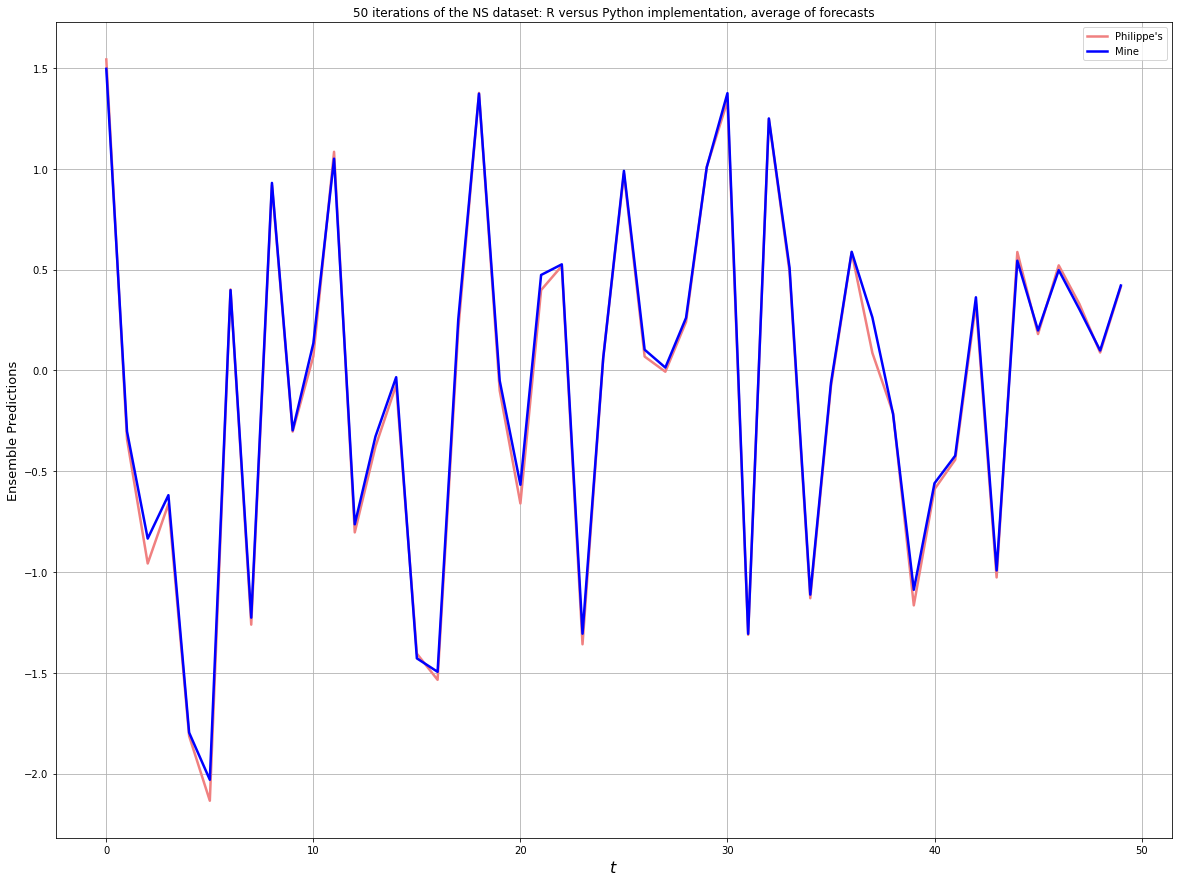

In [20]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 8)
ax.plot(phils_preds.mean(axis = 0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("50 iterations of the NS dataset: R versus Python implementation, average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)